Here I import all my data from my CSV file onto google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


I then try to see the general outline of all my data I just imported

In [ ]:
#getting my data set into collab

import pandas as pd

df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/coach salary data colab upload.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Rank                              130 non-null    float64
 1   Coach                             130 non-null    object 
 2   School                            130 non-null    object 
 3   TotalPay                          130 non-null    float64
 4   Conf.                             130 non-null    object 
 5   ScheduledSchoolPay                130 non-null    float64
 6   Contract Year Pandemic Reduction  130 non-null    object 
 7   ActualSchoolPay                   130 non-null    float64
 8   Total Pandemic Reduction          130 non-null    object 
 9   School Buyout                     131 non-null    object 
 10  Team                              127 non-null    object 
 11  Win-Loss Record                   127 non-null    object 
 12  Win %   

Description of data I will be using today


*   **TotalPay**: the salary that the head coach got paid for the year of 2019
*   **Conf**: The section/division that their team is in (eg. SEC, PAC-12)   
*  **Win %**: The win percentage of each school, 127 schools total

I've gathered all data from USA Today

https://sports.usatoday.com/ncaa/salaries/football/coach

https://www.usatoday.com/story/sports/ncaaf/2021/08/04/college-football-ncaa-assistant-coach-salaries-methodology/5482954001/








**What I want to explore today**

Extract insights using Exploratory Data Analysis.

*   Extract insights using Exploratory Data Analysis.
*   Prove statistically whether or not a coach's salary has an effect on win percentage
*   Prove statistically whether the conference the college is from has and effect on win percentage



In [ ]:
#importing my databases in this box
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics as stats2
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#import seaborn and whatnot
from sqlalchemy import create_engine
sns.set()


Created a function to describe specific data in a column, here we will be checking "TotalPay", "Win %", and "Conf."

In [ ]:
#function to print out descriptive statistics

def series_statistics(column):
  print('statistics for column: {}'.format(column.name))
  print('The max value in the column: {}'.format(column.max()))
  print('The min value in the column: {}'.format(column.min()))
  print('The mode value in the column: {}'.format(column.mode()))
  print('The median value in the column: {}'.format(column.median()))
  print('The mean of the column: {}'.format(column.mean()))
  print('The std of the column: {}'.format(column.std()))

Checking shape of dataframe

In [ ]:
#dataframe examination

df.shape

(131, 15)

For this project, I want to dive into NCAAF coaches’ salaries, assistant coach salaries, and also strength coach salaries. I want schools and also coaches to have a benchmark to what they think they should be paying/getting paid. I want to figure out if a higher salary does translate to a more successful team, and also does the conference they’re in matter? Perhaps it's a combination of both. 


My two hypothesis' I will be testing are as follows;

**1st**
**Alternative**: The higher the coaches’ salaries, the better a team’s W/L ratio is

**Null**: Salaries have no effect on a college football team’s W/L ratio

**2nd**
**Alternative**: If the team is in the SEC or PAC-12, their W/L will tend to be better

**Null**: Team conference has no effect on a college football team’s W/L ratio


In [ ]:
#checking for null values
df.isnull()

,Rank,Coach,School,TotalPay,Conf.,ScheduledSchoolPay,Contract Year Pandemic Reduction,ActualSchoolPay,Total Pandemic Reduction,School Buyout,Team,Win-Loss Record,Win %,MOV,ATS +/-
0,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
127,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
128,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
129,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True


I will run descriptive statistics on the pay scales for head coach, assistant coach, and strength coach. Afterwards I will see if there is correlation between coaches' salaries and W/L ratio.

These are the descriptive statistics for coach's total salary;

In [ ]:
series_statistics(df['TotalPay'])

statistics for column: TotalPay
The max value in the column: 9753221.0
The min value in the column: 0.0
The mode value in the column: 0    0.0
dtype: float64
The median value in the column: 2159954.0
The mean of the column: 2661750.1
The std of the column: 2218288.4925714727


In [ ]:
df[['TotalPay']].describe()

,TotalPay
count,1.300000e+02
mean,2.661750e+06
std,2.218288e+06
min,0.000000e+00
25%,7.790000e+05
50%,2.159954e+06
75%,4.000000e+06
max,9.753221e+06


Descriptive Statistics for the win percentage for each team

In [ ]:
series_statistics(df['Win %'])

statistics for column: Win %
The max value in the column: 1.0
The min value in the column: 0.0
The mode value in the column: 0    0.50
1    0.67
dtype: float64
The median value in the column: 0.5
The mean of the column: 0.494251968503937
The std of the column: 0.2520787219099324


In [ ]:
df[['Win %']].describe()

,Win %
count,127.000000
mean,0.494252
std,0.252079
min,0.000000
25%,0.330000
50%,0.500000
75%,0.685000
max,1.000000


Drew a scatterplot to better see the correlation between "TotalPay" and "Win %", as you can see, it almost seems extremely evident that there is a correlation between a coach's salary and their team's Win %

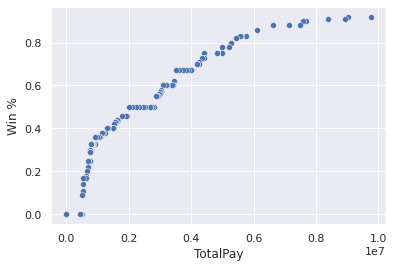

In [ ]:
sns.scatterplot(x="TotalPay", y="Win %", data=df)

Here are histograms of head coach salaries, the Win %, and schools in each conference

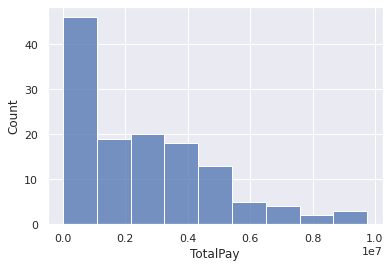

In [ ]:
ax = sns.histplot(df['TotalPay'])

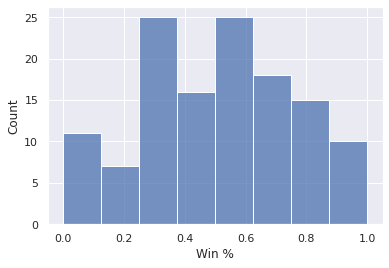

In [ ]:
ax = sns.histplot(df["Win %"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Rank                              130 non-null    float64
 1   Coach                             130 non-null    object 
 2   School                            130 non-null    object 
 3   TotalPay                          130 non-null    float64
 4   Conf.                             130 non-null    object 
 5   ScheduledSchoolPay                130 non-null    float64
 6   Contract Year Pandemic Reduction  130 non-null    object 
 7   ActualSchoolPay                   130 non-null    float64
 8   Total Pandemic Reduction          130 non-null    object 
 9   School Buyout                     131 non-null    object 
 10  Team                              127 non-null    object 
 11  Win-Loss Record                   127 non-null    object 
 12  Win %   

Here I will be trying to see if there is a correlation between the total pay each coach gets and the Win % for each school. 

I will be using the Pearson Correlation Coefficient. This coefficient should be a number between -1 and 1. 

*   A -1 indicates that there is a perfect negative linear relationship, if one variable goes up, the other goes down.
*   A +1 indiciates that there is a perfect positive linear relationship, if one variable goes up, the other goes down.
*   A correlation of 0 shows no linear relationship between the movement of the two variables.

In [ ]:
#trying to see if there is a correlation
df['TotalPay'].corr(df['Win %'])

0.9266695010946496

Since we have a number of **0.9267** which is pretty close to 1, we can assume there is a strong correlation between these two sets of data.

Hypotheses

**1st Alternative**: The higher the coaches’ salaries, the better a team’s W/L ratio is

**Null**: Salaries have no effect on a college football team’s W/L ratio

**Conclusion**


*   Our pearson coefficient is 0.927
*   Since it is very close to +1 we have support to say that salary and win ratio have a very positive correlation to each other.
*   We can safely **reject the null hypothesis** in favor of the alternative that a **coach's salary has an effect on the win percentage for the school.**



For the next set I want to test, I first have to find out some keypoints

I want to see how many different conferences there are;

In [ ]:
df['Conf.'].nunique()

11

There are 11 different conferences that each school is from in this dataframe
Below is a histogram showing the frequency of schools from each conference.

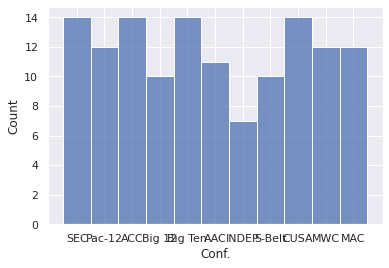

In [ ]:
#histogram to display how many schools in each conference
ax = sns.histplot(df['Conf.'])

In [ ]:
#numbered chart to display counts of histogram
conf_counts = df['Conf.'].value_counts()
conf_counts

SEC        14
Big Ten    14
CUSA       14
ACC        14
MAC        12
MWC        12
Pac-12     12
AAC        11
Big 12     10
S-Belt     10
INDEP       7
Name: Conf., dtype: int64

Descriptive statistics for conferences.

In [ ]:
conf_counts.describe()

count    11.000000
mean     11.818182
std       2.227922
min       7.000000
25%      10.500000
50%      12.000000
75%      14.000000
max      14.000000
Name: Conf., dtype: float64

Wanted a scatterplot to better visualize why we are testing these two groups.

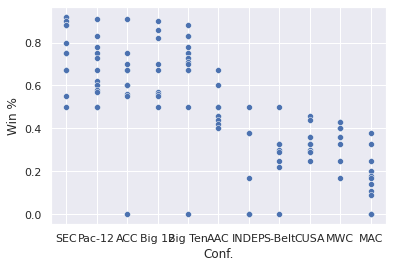

In [ ]:
#scatterplot
sns.scatterplot(x="Conf.", y="Win %", data=df)

As you can see on this scatterplot, it looks like SEC and PAC-12 have the better win percentage, with this evidence, I want to better support my hypothesis that the conference a team is in impacts the win percentage.

Here I will be trying to see if there is a correlation between the total pay each coach gets and the conference each college is in.

I will be using the Pearson Correlation Coefficient. This coefficient should be a number between -1 and 1. 

*   A -1 indicates that there is a perfect negative linear relationship, if one variable goes up, the other goes down.
*   A +1 indiciates that there is a perfect positive linear relationship, if one variable goes up, the other goes down.
*   A correlation of 0 shows no linear relationship between the movement of the two variables.

Converting my categorical data in the 'Conference' column and assigning each conference a numerical value.

In [ ]:
conference = df['Conf.'].astype('category').cat.codes

In [ ]:
df['TotalPay'].corr(conference)

0.03479830044969142

Our coefficient here is very close to 0, we can safely assume there is no correlation between the two variables.

**2nd Alternative**: If the team is in the SEC or PAC-12, their W/L will tend to be better

**Null**: Team conference has no effect on a college football team’s W/L ratio

**Conclusion**


*   Our alpha is pearson coefficient is 0.034 which is extremely close to 0
*   A coefficient of 0 indicates no linear relationship between movement of the two variables
*   We can safely **accept the null hypothesis** in favor of the alternative that a **college in a SEC or PAC-12 conference has no effect on the win percentage for the school.**

After running statistical tests on my two hypotheses, I can safely conclude that we have support for my two alternative hypotheses that;


*   **A coach's salary has an effect on the win percentage for the school**
*   **A college in a SEC or PAC-12 conference has no effect on the win percentage for the school**

We can best use this information when potential candidates for coaches want to consider a coaching job or even for potential athletes debating on what school they want to attend. Its of utmost importance for people to know that they are getting into a good school and to try to utilize as much information as possible to make that decision.